In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import xgboost as xgb

In [110]:
pd.set_option('display.max_columns', None)

data = pd.read_csv('/Users/iangani/Desktop/Cervical_Cancer_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [111]:
data.describe(include='all')

Age Number of sexual partners First sexual intercourse  \
count   858.000000                       858                      858   
unique         NaN                        13                       22   
top            NaN                       2.0                     15.0   
freq           NaN                       272                      163   
mean     26.820513                       NaN                      NaN   
std       8.497948                       NaN                      NaN   
min      13.000000                       NaN                      NaN   
25%      20.000000                       NaN                      NaN   
50%      25.000000                       NaN                      NaN   
75%      32.000000                       NaN                      NaN   
max      84.000000                       NaN                      NaN   

       Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
count                 858    858            858                 858   
unique                 12      3             31                  63   
top                   1.0    0.0            0.0                 0.0   
freq                  270    722            722                 722   
mean                  NaN    NaN            NaN                 NaN   
std                   NaN    NaN            NaN                 NaN   
min                   NaN    NaN            NaN                 NaN   
25%                   NaN    NaN            NaN                 NaN   
50%                   NaN    NaN            NaN                 NaN   
75%                   NaN    NaN            NaN                 NaN   
max                   NaN    NaN            NaN                 NaN   

       Hormonal Contraceptives Hormonal Contraceptives (years)  IUD  \
count                      858                             858  858   
unique                       3                              41    3   
top                        1.0                             0.0  0.0   
freq                       481                             269  658   
mean                       NaN                             NaN  NaN   
std                        NaN                             NaN  NaN   
min                        NaN                             NaN  NaN   
25%                        NaN                             NaN  NaN   
50%                        NaN                             NaN  NaN   
75%                        NaN                             NaN  NaN   
max                        NaN                             NaN  NaN   

       IUD (years) STDs STDs (number) STDs:condylomatosis  \
count          858  858           858                 858   
unique          27    3             6                   3   
top            0.0  0.0           0.0                 0.0   
freq           658  674           674                 709   
mean           NaN  NaN           NaN                 NaN   
std            NaN  NaN           NaN                 NaN   
min            NaN  NaN           NaN                 NaN   
25%            NaN  NaN           NaN                 NaN   
50%            NaN  NaN           NaN                 NaN   
75%            NaN  NaN           NaN                 NaN   
max            NaN  NaN           NaN                 NaN   

       STDs:cervical condylomatosis STDs:vaginal condylomatosis  \
count                           858                         858   
unique                            2                           3   
top                             0.0                         0.0   
freq                            753                         749   
mean                            NaN                         NaN   
std                             NaN                         NaN   
min                             NaN                         NaN   
25%                             NaN                         NaN   
50%                             NaN                         NaN   
75%                          

In [112]:
data.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [113]:
Cases_count = (data['Biopsy'] == 1).sum()
Controls_count = (data['Biopsy'] == 0).sum()

total_samples = len(data)

Cases_proportion = Cases_count / total_samples
Controls_proportion = Controls_count / total_samples

imbalance_ratio = Controls_count / Cases_count

print(f"Total samples: {total_samples}")
print(f"Cases count: {Cases_count}")
print(f"Controls count: {Controls_count}")
print(f"Proportion of cases: {Cases_proportion:.2%}")
print(f"Proportion of controls: {Controls_proportion:.2%}")
print(f"Imbalance ratio: {imbalance_ratio}")

Total samples: 858
Cases count: 55
Controls count: 803
Proportion of cases: 6.41%
Proportion of controls: 93.59%
Imbalance ratio: 14.6


In [114]:
data = data.replace('?', pd.NA)
na_count = data.isna().sum()
rows = len(data)
na_proportion = (na_count / rows) * 100
print(na_proportion)

Age                                    0.000000
Number of sexual partners              3.030303
First sexual intercourse               0.815851
Num of pregnancies                     6.526807
Smokes                                 1.515152
Smokes (years)                         1.515152
Smokes (packs/year)                    1.515152
Hormonal Contraceptives               12.587413
Hormonal Contraceptives (years)       12.587413
IUD                                   13.636364
IUD (years)                           13.636364
STDs                                  12.237762
STDs (number)                         12.237762
STDs:condylomatosis                   12.237762
STDs:cervical condylomatosis          12.237762
STDs:vaginal condylomatosis           12.237762
STDs:vulvo-perineal condylomatosis    12.237762
STDs:syphilis                         12.237762
STDs:pelvic inflammatory disease      12.237762
STDs:genital herpes                   12.237762
STDs:molluscum contagiosum            12

In [115]:
plt.figure(figsize = (8,8))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="Blues")

<AxesSubplot:>

In [116]:
data = data.drop(columns = ['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])
data

Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                     <NA>   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
2                  1.0    0.0            0.0                 0.0   
3                  4.0    1.0           37.0                37.0   
4                  4.0    0.0            0.0                 0.0   
..                 ...    ...            ...                 ...   
853                0.0    0.0            0.0                 0.0   
854                1.0    0.0            0.0                 0.0   
855                0.0    0.0            0.0                 0.0   
856                2.0    0.0            0.0                 0.0   
857                1.0    0.0            0.0                 0.0   

    Hormonal Contraceptives Hormonal Contraceptives (years)  IUD IUD (years)  \
0                       0.0                             0.0  0.0         0.0   
1                       0.0                             0.0  0.0         0.0   
2                       0.0                             0.0  0.0         0.0   
3                       1.0                             3.0  0.0         0.0   
4                       1.0                            15.0  0.0         0.0   
..                      ...                             ...  ...         ...   
853                     0.0                             0.0  0.0         0.0   
854                     1.0                             8.0  0.0         0.0   
855                     1.0                            0.08  0.0         0.0   
856                     1.0                            0.08  0.0         0.0   
857                     1.0                             0.5  0.0         0.0   

    STDs STDs (number) STDs:condylomatosis STDs:cervical condylomatosis  \
0    0.0           0.0                 0.0                          0.0   
1    0.0           0.0                 0.0                          0.0   
2    0.0           0.0                 0.0                          0.0   
3    0.0           0.0                 0.0                          0.0   
4    0.0           0.0                 0.0                          0.0   
..   ...           ...                 ...                          ...   
853  0.0           0.0                 0.0                          0.0   
854  0.0           0.0                 0.0                          0.0   
855  0.0           0.0                 0.0                          0.0   
856  0.0           0.0                 0.0                          0.0   
857  0.0           0.0                 0.0                          0.0   

    STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis  \
0                           0.0                                0.0   
1                           0.0                                0.0   
2                           0.0                                0.0   
3                           0.0                                0.0   
4                           0.0                                0.0   
..                          ...                                ...   
853                         0.0                                0.0   
854      

In [117]:
data = data.apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [118]:
data = data.fillna(data.mean())
data

Age  Number of sexual partners  First sexual intercourse  \
0     18                        4.0                   15.0000   
1     15                        1.0                   14.0000   
2     34                        1.0                   16.9953   
3     52                        5.0                   16.0000   
4     46                        3.0                   21.0000   
..   ...                        ...                       ...   
853   34                        3.0                   18.0000   
854   32                        2.0                   19.0000   
855   25                        2.0                   17.0000   
856   33                        2.0                   24.0000   
857   29                        2.0                   20.0000   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                   1.0     0.0             0.0                  0.0   
1                   1.0     0.0             0.0                  0.0   
2                   1.0     0.0             0.0                  0.0   
3                   4.0     1.0            37.0                 37.0   
4                   4.0     0.0             0.0                  0.0   
..                  ...     ...             ...                  ...   
853                 0.0     0.0             0.0                  0.0   
854                 1.0     0.0             0.0                  0.0   
855                 0.0     0.0             0.0                  0.0   
856                 2.0     0.0             0.0                  0.0   
857                 1.0     0.0             0.0                  0.0   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  \
0                        0.0                             0.00  0.0   
1                        0.0                             0.00  0.0   
2                        0.0                             0.00  0.0   
3                        1.0                             3.00  0.0   
4                        1.0                            15.00  0.0   
..                       ...                              ...  ...   
853                      0.0                             0.00  0.0   
854                      1.0                             8.00  0.0   
855                      1.0                             0.08  0.0   
856                      1.0                             0.08  0.0   
857                      1.0                             0.50  0.0   

     IUD (years)  STDs  STDs (number)  STDs:condylomatosis  \
0            0.0   0.0            0.0                  0.0   
1            0.0   0.0            0.0                  0.0   
2            0.0   0.0            0.0                  0.0   
3            0.0   0.0            0.0                  0.0   
4            0.0   0.0            0.0                  0.0   
..           ...   ...            ...                  ...   
853          0.0   0.0            0.0                  0.0   
854          0.0   0.0            0.0                  0.0   
855          0.0   0.0            0.0                  0.0   
856          0.0   0.0            0.0                  0.0   
857          0.0   0.0            0.0                  0.0   

     STDs:cervical condylomatosis  STDs:vaginal condylomatosis  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          0.0   
3                             0.0                          0.0   
4                             0.0                          0.0   
..                            ...                          ...   
853                           0.0                          0.0   
854                           0.0                          0.0   
855                           0.0                          0.0   
856                           0.0                          0.0   
857                           0.0              

In [119]:
na_count = data.isna().sum()
rows = len(data)
na_proportion = (na_count / rows) * 100
print(na_proportion)

Age                                   0.0
Number of sexual partners             0.0
First sexual intercourse              0.0
Num of pregnancies                    0.0
Smokes                                0.0
Smokes (years)                        0.0
Smokes (packs/year)                   0.0
Hormonal Contraceptives               0.0
Hormonal Contraceptives (years)       0.0
IUD                                   0.0
IUD (years)                           0.0
STDs                                  0.0
STDs (number)                         0.0
STDs:condylomatosis                   0.0
STDs:cervical condylomatosis          0.0
STDs:vaginal condylomatosis           0.0
STDs:vulvo-perineal condylomatosis    0.0
STDs:syphilis                         0.0
STDs:pelvic inflammatory disease      0.0
STDs:genital herpes                   0.0
STDs:molluscum contagiosum            0.0
STDs:AIDS                             0.0
STDs:HIV                              0.0
STDs:Hepatitis B                  

In [120]:
data.describe(include='all')

Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 858.000000                858.000000   
mean    26.820513                   2.527644                 16.995300   
std      8.497948                   1.642267                  2.791883   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          858.000000  858.000000      858.000000           858.000000   
mean             2.275561    0.145562        1.219721             0.453144   
std              1.399325    0.350189        4.057885             2.209657   
min              0.000000    0.000000        0.000000             0.000000   
25%              1.000000    0.000000        0.000000             0.000000   
50%              2.000000    0.000000        0.000000             0.000000   
75%              3.000000    0.000000        0.000000             0.000000   
max             11.000000    1.000000       37.000000            37.000000   

       Hormonal Contraceptives  Hormonal Contraceptives (years)         IUD  \
count               858.000000                       858.000000  858.000000   
mean                  0.641333                         2.256419    0.112011   
std                   0.448671                         3.519082    0.293260   
min                   0.000000                         0.000000    0.000000   
25%                   0.000000                         0.000000    0.000000   
50%                   1.000000                         1.000000    0.000000   
75%                   1.000000                         2.256419    0.000000   
max                   1.000000                        30.000000    1.000000   

       IUD (years)        STDs  STDs (number)  STDs:condylomatosis  \
count   858.000000  858.000000     858.000000           858.000000   
mean      0.514804    0.104914       0.176627             0.058433   
std       1.805585    0.287247       0.526440             0.219868   
min       0.000000    0.000000       0.000000             0.000000   
25%       0.000000    0.000000       0.000000             0.000000   
50%       0.000000    0.000000       0.000000             0.000000   
75%       0.000000    0.000000       0.000000             0.000000   
max      19.000000    1.000000       4.000000             1.000000   

       STDs:cervical condylomatosis  STDs:vaginal condylomatosis  \
count                         858.0                   858.000000   
mean                            0.0                     0.005312   
std                             0.0                     0.068137   
min                             0.0                     0.000000   
25%                             0.0                     0.000000   
50%                             0.0                     0.000000   
75%                             0.0                     0.000000   
max                             0.0                     1.000000   

       STDs:vulvo-perineal condylomatosis  STDs:syphilis  \
count                          858.000000     858.000000   
mean                             0.057105       0.023904   
std                              0.217508       0.143183   
min                              0.000000       0.000000   
25%                              0.000000       0.000000   
50%                              0.000000       0.000000   
75%                              0.000000       0.000000   
max                              1.000000       1.000000   

       STDs:pelvic inflammatory disease  STDs:genital herpes  \
count                        858.000000           858.000000   
mean               

In [93]:
correlation_matrix = data.corr()
correlation_matrix

Age  Number of sexual partners  \
Age                                 1.000000                   0.084896   
Number of sexual partners           0.084896                   1.000000   
First sexual intercourse            0.369168                  -0.147937   
Num of pregnancies                  0.526137                   0.076719   
Smokes                              0.055813                   0.238078   
Smokes (years)                      0.217349                   0.177117   
Smokes (packs/year)                 0.131180                   0.175153   
Hormonal Contraceptives             0.065624                   0.006342   
Hormonal Contraceptives (years)     0.277181                   0.018552   
IUD                                 0.267662                   0.030005   
IUD (years)                         0.205886                   0.004215   
STDs                                0.010017                   0.053754   
STDs (number)                      -0.015488                   0.039359   
STDs:condylomatosis                -0.025012                   0.034646   
STDs:cervical condylomatosis             NaN                        NaN   
STDs:vaginal condylomatosis         0.006220                  -0.042924   
STDs:vulvo-perineal condylomatosis -0.022614                   0.036750   
STDs:syphilis                       0.010442                   0.027178   
STDs:pelvic inflammatory disease    0.023216                   0.030616   
STDs:genital herpes                -0.029076                  -0.031826   
STDs:molluscum contagiosum         -0.000919                   0.030616   
STDs:AIDS                                NaN                        NaN   
STDs:HIV                           -0.002025                   0.019871   
STDs:Hepatitis B                   -0.029076                  -0.011012   
STDs:HPV                            0.038546                   0.013871   
STDs: Number of diagnosis          -0.001606                   0.051559   
Dx:Cancer                           0.110340                   0.022309   
Dx:CIN                              0.061443                   0.015691   
Dx:HPV                              0.101722                   0.027264   
Dx                                  0.092635                   0.022982   
Hinselmann                         -0.003967                  -0.039273   
Schiller                            0.103283                  -0.008899   
Citology                           -0.016862                   0.021839   
Biopsy                              0.055956                  -0.001429   

                                    First sexual intercourse  \
Age                                                 0.369168   
Number of sexual partners                          -0.147937   
First sexual intercourse                            1.000000   
Num of pregnancies                                 -0.058223   
Smokes                                             -0.123602   
Smokes (years)                                     -0.058366   
Smokes (packs/year)                                -0.056332   
Hormonal Contraceptives                             0.018344   
Hormonal Contraceptives (years)                     0.008000   
IUD                                                -0.020975   
IUD (years)                                        -0.024803   
STDs                                               -0.013133   
STDs (number)                                       0.006487   
STDs:condylomatosis                                 0.026777   
STDs:cervical condylomatosis                             NaN   
STDs:vaginal condylomatosis                         0.071425   
STDs:vulvo-perineal condylomatosis                  0.031082   
STDs:syphilis                                      -0.100999   
STDs:pelvic inflammatory disease                   -0.001089   
STDs:genital herpes                                 0.023398   
STDs:molluscum contagiosum                         -0.013332   
STDs:AI

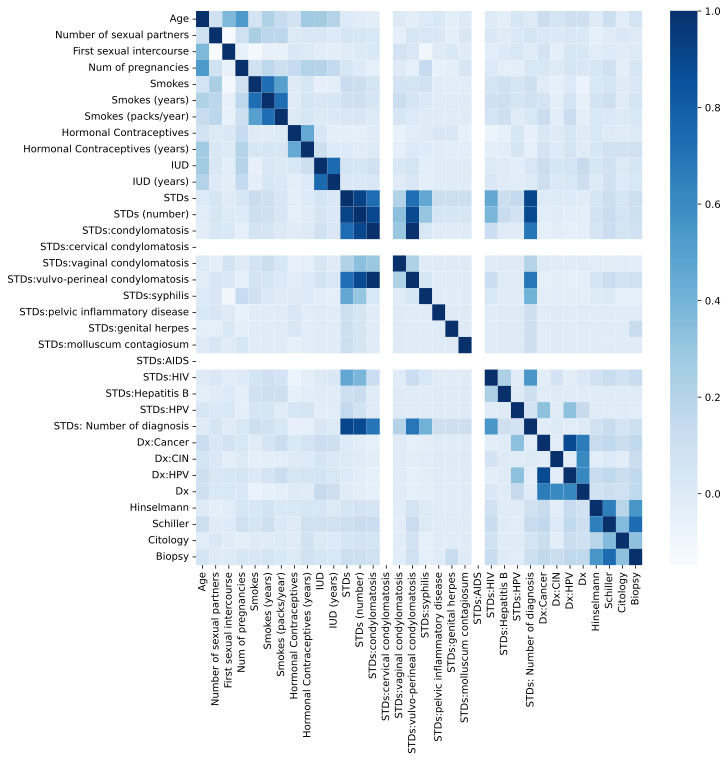

In [94]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix, cmap='Blues')
plt.show()

In [95]:
target = data['Biopsy']
input_feature = data.drop(columns = ['Biopsy'])

In [96]:
target.shape

(858,)

In [97]:
input_feature.shape

(858, 33)

In [98]:
X = np.array(input_feature).astype('float32')
y = np.array(target).astype('float32')
y.shape

(858,)

In [99]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [101]:
kf = StratifiedKFold(n_splits=5)
all_y_true = []
all_y_pred = []
all_y_proba = []

for train_index, test_index in kf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)
    all_y_proba.extend(y_proba)

In [102]:
print("Accuracy:", accuracy_score(all_y_true, all_y_pred))
print("Precision:", precision_score(all_y_true, all_y_pred))
print("Recall:", recall_score(all_y_true, all_y_pred))
print("F1 Score:", f1_score(all_y_true, all_y_pred))
print("ROC AUC:", roc_auc_score(all_y_true, all_y_proba))

Accuracy: 0.9498834498834499
Precision: 0.6363636363636364
Recall: 0.509090909090909
F1 Score: 0.5656565656565656
ROC AUC: 0.9357749349032037


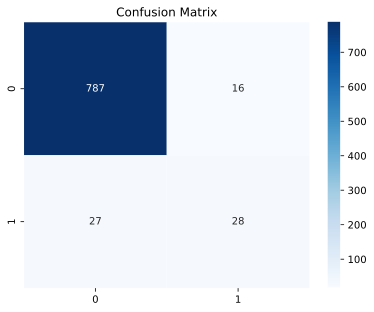

In [103]:
cm = confusion_matrix(all_y_true, all_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

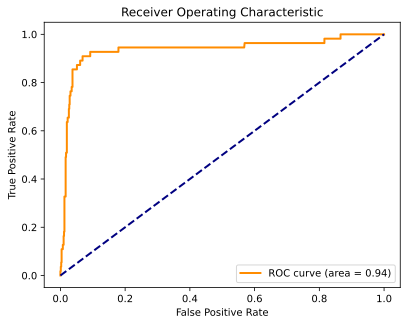

In [104]:
fpr, tpr, _ = roc_curve(all_y_true, all_y_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(all_y_true, all_y_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()